### 2. Άνοιγμα αρχείου και προεργασία

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import time

In [2]:
from sklearn.datasets import fetch_openml
X, y_str = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
df = pd.DataFrame(data=np.c_[X,y_str])
df.iloc[[0,4,33,64,90,2097,56789], :]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
56789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### Μετατροπή του y από string σε int με LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y_str)

In [5]:
y

array([5, 0, 4, ..., 4, 5, 6])

#### Διαχωρισμός σε train και test datasets (με slicing)

In [6]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [7]:
print("Διαστάσεις των δεδομένων:", df.shape)

Διαστάσεις των δεδομένων: (70000, 785)


In [8]:
#πιο απλά df[784].nunique()
last_column = df.iloc[: , -1:]
print(last_column.nunique())
print("Τα δεδομένα ταξινομούνται σε 10 κλάσεις")

784    10
dtype: int64
Τα δεδομένα ταξινομούνται σε 10 κλάσεις


In [9]:
display(Markdown(
    "**Training data mean**: " + str(np.mean(X_train,0)) + "<br>" +
    "**Training data std**: " + str(np.std(X_train,0))  + "<br>" +
    "**Training data max**: " + str(np.max(X_train,0))  + "<br>" +
    "**Training data min**: " + str(np.min(X_train,0))  + "<br>" +
    "**Testing data mean**: " + str(np.mean(X_test,0))  + "<br>" +
    "**Testing data std**: " + str(np.std(X_test,0))  + "<br>" +
    "**Testing data max**: " + str(np.max(X_test,0))  + "<br>" +
    "**Testing data min**: " + str(np.min(X_test,0))  + "<br>"
    
))

**Training data mean**: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
 4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
 1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
 1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
 5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
 6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
 2.64183333e-01 5.06616667e-01 8.66800000e-01 1.29008333e+00
 1.87035000e+00 2.52995000e+00 3.20161667e+00 3.62555000e+00
 3.72198333e+00 3.39255000e+00 2.80293333e+00 2.04438333e+00
 1.20211667e+00 6.33450000e-01 2.96166667e-01 9.39833333e-02
 3.52166667e-02 8.63333333e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.23333333e-03 5.85000000e-03
 1.20166667e-02 6.97666667e-02 2.12083333e-01 5.46100000e-01
 1.15441667e+00 2.21590000e+00 3.63963333e+00 5.43800000e+00
 7.40705000e+00 9.69673333e+00 1.18830833e+01 1.32373667e+01
 1.31246167e+01 1.18135167e+01 9.54366667e+00 6.86305000e+00
 4.19365000e+00 2.27463333e+00 1.06103333e+00 4.13066667e-01
 1.62083333e-01 2.77666667e-02 2.80000000e-03 0.00000000e+00
 0.00000000e+00 6.33333333e-04 5.21666667e-03 1.43500000e-02
 8.08833333e-02 4.10216667e-01 1.04323333e+00 2.41928333e+00
 4.77575000e+00 8.39441667e+00 1.33102667e+01 1.94773000e+01
 2.70366833e+01 3.52121667e+01 4.18408000e+01 4.52526000e+01
 4.43388333e+01 3.91414500e+01 3.13282167e+01 2.29239333e+01
 1.48310167e+01 8.66140000e+00 4.54796667e+00 2.13701667e+00
 8.62900000e-01 2.07750000e-01 2.96500000e-02 2.03333333e-03
 0.00000000e+00 0.00000000e+00 1.03166667e-02 6.33500000e-02
 3.95466667e-01 1.46340000e+00 3.58778333e+00 7.22781667e+00
 1.30171167e+01 2.12179167e+01 3.15004000e+01 4.42063667e+01
 5.89038500e+01 7.38041500e+01 8.51027333e+01 9.05997833e+01
 8.89239333e+01 8.01812500e+01 6.59428167e+01 4.97938333e+01
 3.43498333e+01 2.15100000e+01 1.23903167e+01 6.63911667e+00
 2.99271667e+00 8.43666667e-01 1.41633333e-01 4.70000000e-03
 0.00000000e+00 1.83333333e-04 2.75000000e-02 2.21433333e-01
 1.11951667e+00 3.28990000e+00 7.43646667e+00 1.42544333e+01
 2.41377500e+01 3.72885167e+01 5.31154000e+01 7.09128167e+01
 8.92784667e+01 1.06232967e+02 1.18506117e+02 1.24098150e+02
 1.21711333e+02 1.12033333e+02 9.61081167e+01 7.51653667e+01
 5.40371167e+01 3.53124833e+01 2.09919000e+01 1.14424333e+01
 5.38776667e+00 1.85558333e+00 3.72700000e-01 3.03000000e-02
 7.83333333e-04 1.97333333e-02 1.07666667e-01 5.95650000e-01
 2.31240000e+00 5.92876667e+00 1.24360500e+01 2.24518000e+01
 3.62947833e+01 5.38984167e+01 7.37647167e+01 9.41030833e+01
 1.11579483e+02 1.24999917e+02 1.32759117e+02 1.35398700e+02
 1.33338650e+02 1.26677533e+02 1.13546667e+02 9.37442667e+01
 6.97779333e+01 4.68328833e+01 2.81439167e+01 1.52010500e+01
 7.03366667e+00 2.58303333e+00 5.13100000e-01 3.18833333e-02
 4.06666667e-03 5.08166667e-02 3.29366667e-01 1.31735000e+00
 3.74813333e+00 8.48346667e+00 1.68181833e+01 2.95974000e+01
 4.69301500e+01 6.81070000e+01 9.02913833e+01 1.08475717e+02
 1.19435417e+02 1.23393850e+02 1.23038050e+02 1.22340650e+02
 1.22730050e+02 1.22144100e+02 1.16260933e+02 1.00610600e+02
 7.73180333e+01 5.28976000e+01 3.18106167e+01 1.63576667e+01
 7.18566667e+00 2.60661667e+00 4.81583333e-01 2.71833333e-02
 4.86666667e-03 7.94666667e-02 5.12016667e-01 1.71938333e+00
 4.44581667e+00 9.80663333e+00 1.95264833e+01 3.45048167e+01
 5.47009000e+01 7.81380333e+01 9.90387000e+01 1.10600467e+02
 1.10787550e+02 1.04553617e+02 9.90472000e+01 9.93883833e+01
 1.04333217e+02 1.10882067e+02 1.11078267e+02 9.91469167e+01
 7.70405500e+01 5.27057667e+01 3.14484167e+01 1.53927167e+01
 5.96113333e+00 1.89796667e+00 3.51833333e-01 2.82166667e-02
 6.66666667e-03 9.85666667e-02 5.23033333e-01 1.67458333e+00
 4.28908333e+00 9.87643333e+00 2.05393167e+01 3.71890333e+01
 5.97151167e+01 8.33987333e+01 1.00225900e+02 1.03168817e+02
 9.38921333e+01 8.29528167e+01 7.94228333e+01 8.45250167e+01
 9.38685833e+01 1.04427533e+02 1.06281183e+02 9.42218667e+01
 7.18490667e+01 4.83172500e+01 2.84781833e+01 1.34981667e+01
 4.60050000e+00 1.15010000e+00 2.21833333e-01 1.87333333e-02
 5.93333333e-03 7.64000000e-02 4.20883333e-01 1.28036667e+00
 3.64608333e+00 9.55390000e+00 2.11332333e+01 3.98545167e+01
 6.40892167e+01 8.72096667e+01 9.87805833e+01 9.48668500e+01
 8.16835333e+01 7.33427667e+01 7.61450667e+01 8.54255500e+01
 9.72928000e+01 1.07482583e+02 1.05509433e+02 8.90295000e+01
 6.49443500e+01 4.24968833e+01 2.53411000e+01 1.25802167e+01
 3.98988333e+00 6.04533333e-01 1.24500000e-01 8.16666667e-03
 3.80000000e-03 4.36833333e-02 2.42033333e-01 8.78816667e-01
 3.06883333e+00 9.60745000e+00 2.27779833e+01 4.35750333e+01
 6.89713333e+01 9.02567000e+01 9.78938167e+01 9.10827333e+01
 7.97067500e+01 7.93691167e+01 8.93387000e+01 1.01714517e+02
 1.13037867e+02 1.17581100e+02 1.07426717e+02 8.45188833e+01
 5.85871667e+01 3.82634500e+01 2.37392333e+01 1.27121000e+01
 4.29471667e+00 4.43250000e-01 7.97833333e-02 1.01666667e-02
 5.33333333e-04 1.82500000e-02 1.22616667e-01 6.07333333e-01
 2.91783333e+00 1.06341667e+01 2.55538000e+01 4.75837167e+01
 7.26322333e+01 9.16736500e+01 9.68884167e+01 9.10977333e+01
 8.68673000e+01 9.69665500e+01 1.11371833e+02 1.23972067e+02
 1.29806550e+02 1.26599550e+02 1.08880333e+02 8.11576333e+01
 5.52258667e+01 3.72046000e+01 2.39728000e+01 1.36437500e+01
 5.10268333e+00 5.84700000e-01 8.29833333e-02 1.08666667e-02
 1.88333333e-03 8.25000000e-03 5.41666667e-02 4.66183333e-01
 3.06558333e+00 1.23512667e+01 2.85280667e+01 5.05083833e+01
 7.37506167e+01 9.03691833e+01 9.50769833e+01 9.32885333e+01
 9.78289500e+01 1.15421317e+02 1.30267250e+02 1.39553600e+02
 1.37100633e+02 1.28085750e+02 1.06994517e+02 7.95539500e+01
 5.60965667e+01 3.89430667e+01 2.55374667e+01 1.46162500e+01
 5.72158333e+00 8.20300000e-01 9.24500000e-02 2.21666667e-03
 7.33333333e-04 3.86666667e-03 4.51000000e-02 5.05583333e-01
 3.56056667e+00 1.44081500e+01 3.09883167e+01 5.12096333e+01
 7.14404333e+01 8.57322167e+01 9.13810333e+01 9.42424333e+01
 1.05047117e+02 1.23204200e+02 1.35689433e+02 1.39110050e+02
 1.31804500e+02 1.21436567e+02 1.01340300e+02 7.83792667e+01
 5.82829000e+01 4.12509333e+01 2.69801167e+01 1.48906000e+01
 5.82828333e+00 1.07956667e+00 1.48216667e-01 1.08333333e-02
 6.66666667e-04 3.96666667e-03 7.43333333e-02 6.22966667e-01
 4.46996667e+00 1.65289667e+01 3.25549167e+01 4.99447333e+01
 6.63117167e+01 7.78862667e+01 8.37070500e+01 8.94484167e+01
 1.01136017e+02 1.15857400e+02 1.26473417e+02 1.27426650e+02
 1.21056817e+02 1.11218100e+02 9.53723333e+01 7.73547833e+01
 5.96073333e+01 4.20403333e+01 2.67287667e+01 1.42431167e+01
 5.61555000e+00 1.28710000e+00 1.91500000e-01 1.23000000e-02
 0.00000000e+00 7.28333333e-03 1.12200000e-01 9.53350000e-01
 5.95223333e+00 1.85244000e+01 3.34512000e+01 4.81763500e+01
 6.04605333e+01 6.92180333e+01 7.46814167e+01 8.07367000e+01
 8.95865500e+01 1.01950417e+02 1.12616500e+02 1.15436917e+02
 1.12244833e+02 1.04524150e+02 9.26265833e+01 7.72614833e+01
 5.93285167e+01 4.08083000e+01 2.49427500e+01 1.28348000e+01
 5.15665000e+00 1.41666667e+00 2.10033333e-01 8.88333333e-03
 1.90000000e-03 5.31666667e-03 1.80500000e-01 1.52015000e+00
 7.62145000e+00 2.04178667e+01 3.49108333e+01 4.81825667e+01
 5.82768500e+01 6.59944667e+01 7.17466333e+01 7.65832833e+01
 8.31222000e+01 9.51299333e+01 1.06557200e+02 1.12201383e+02
 1.11347933e+02 1.05018283e+02 9.36185833e+01 7.66274333e+01
 5.67010833e+01 3.77625667e+01 2.25467167e+01 1.13823333e+01
 4.57905000e+00 1.29855000e+00 1.53933333e-01 1.21833333e-02
 2.50000000e-04 1.21833333e-02 2.86316667e-01 2.04381667e+00
 8.72351667e+00 2.17344667e+01 3.68331667e+01 5.09790667e+01
 6.23501500e+01 7.12715167e+01 7.78803000e+01 8.26346667e+01
 8.99674333e+01 1.01406317e+02 1.12445483e+02 1.17803450e+02
 1.15924617e+02 1.07432500e+02 9.22773833e+01 7.18833000e+01
 5.08002500e+01 3.26939667e+01 1.87729667e+01 9.15635000e+00
 3.64005000e+00 1.06850000e+00 1.46700000e-01 6.83333333e-03
 0.00000000e+00 1.52666667e-02 3.32000000e-01 2.25566667e+00
 8.51305000e+00 2.06940833e+01 3.70852167e+01 5.37940333e+01
 6.88695000e+01 8.11596000e+01 9.04059167e+01 9.78863000e+01
 1.06734567e+02 1.17339517e+02 1.24952417e+02 1.25555750e+02
 1.18216250e+02 1.03805833e+02 8.38763833e+01 6.12356500e+01
 4.09525000e+01 2.49440333e+01 1.36286167e+01 6.53750000e+00
 2.71388333e+00 7.49166667e-01 1.11683333e-01 1.68333333e-03
 5.33333333e-04 1.27000000e-02 2.84233333e-01 1.83920000e+00
 6.63258333e+00 1.69004833e+01 3.28094667e+01 5.15708833e+01
 7.04237333e+01 8.72520000e+01 1.00985133e+02 1.12455750e+02
 1.22594000e+02 1.30372300e+02 1.31844900e+02 1.24868033e+02
 1.10025800e+02 8.94660000e+01 6.65912667e+01 4.55973833e+01
 2.85566667e+01 1.62958167e+01 8.51148333e+00 4.10908333e+00
 1.70298333e+00 4.43816667e-01 5.90500000e-02 6.50000000e-04
 5.16666667e-04 9.83333333e-04 1.87083333e-01 1.08796667e+00
 3.94443333e+00 1.08453667e+01 2.33906333e+01 4.06385333e+01
 6.09691833e+01 8.10054000e+01 9.91114333e+01 1.13100500e+02
 1.22524317e+02 1.25302250e+02 1.20613567e+02 1.07185867e+02
 8.77064167e+01 6.59730500e+01 4.53337167e+01 2.87308167e+01
 1.69034500e+01 9.16145000e+00 4.70896667e+00 2.22501667e+00
 8.35133333e-01 1.89116667e-01 1.78333333e-02 1.20000000e-03
 0.00000000e+00 0.00000000e+00 6.41666667e-02 4.18766667e-01
 1.73270000e+00 5.01473333e+00 1.20309167e+01 2.39401333e+01
 4.02565833e+01 5.88924833e+01 7.72688667e+01 9.20322000e+01
 9.97043833e+01 9.91646667e+01 9.05921000e+01 7.55835000e+01
 5.75861333e+01 4.01938000e+01 2.54972333e+01 1.52398333e+01
 8.52368333e+00 4.41923333e+00 2.20506667e+00 9.81650000e-01
 3.10366667e-01 5.79666667e-02 9.61666667e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.58500000e-02 1.22200000e-01
 5.43633333e-01 1.60085000e+00 4.20331667e+00 9.14358333e+00
 1.68276167e+01 2.70768167e+01 3.81033833e+01 4.70437833e+01
 5.16087500e+01 5.09622500e+01 4.54375833e+01 3.67445333e+01
 2.74417833e+01 1.91085833e+01 1.21141500e+01 7.21490000e+00
 3.95933333e+00 1.99318333e+00 9.51233333e-01 3.99633333e-01
 1.01816667e-01 2.21833333e-02 1.93333333e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.56666667e-03 1.77833333e-02
 1.27783333e-01 4.74500000e-01 1.40550000e+00 3.18078333e+00
 6.14340000e+00 9.82870000e+00 1.38693333e+01 1.67183333e+01
 1.81000167e+01 1.77754000e+01 1.58076667e+01 1.31235500e+01
 1.04980500e+01 7.79116667e+00 5.22193333e+00 3.16213333e+00
 1.69133333e+00 8.25383333e-01 3.70583333e-01 1.39816667e-01
 3.12666667e-02 3.56666667e-03 1.73333333e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.33333333e-04
 3.54500000e-02 1.63083333e-01 5.38283333e-01 1.19935000e+00
 2.31608333e+00 3.51143333e+00 4.85021667e+00 5.98023333e+00
 6.44481667e+00 6.25923333e+00 5.57051667e+00 4.45076667e+00
 3.53493333e+00 2.59181667e+00 1.70116667e+00 1.00860000e+00
 5.40283333e-01 2.38400000e-01 7.52666667e-02 1.61666667e-02
 5.16666667e-04 9.83333333e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.53333333e-03 1.55833333e-02 4.16333333e-02 8.92000000e-02
 1.28216667e-01 1.96733333e-01 3.36016667e-01 4.29966667e-01
 5.25983333e-01 5.90683333e-01 6.88033333e-01 5.92066667e-01
 4.82733333e-01 3.43516667e-01 2.00433333e-01 8.88666667e-02
 4.56333333e-02 1.92833333e-02 1.51166667e-02 2.00000000e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]<br>**Training data std**: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.75319812e-01 1.36117791e+00 8.81808959e-01 3.67420400e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.53191821e-02 1.94634255e-01 1.05500260e+00 2.09509594e+00
 2.96203852e+00 3.32385186e+00 4.86925744e+00 5.52898708e+00
 5.69363184e+00 5.69353295e+00 5.92301803e+00 5.76607219e+00
 5.97036202e+00 5.41337618e+00 4.33045725e+00 3.71652963e+00
 3.20866334e+00 1.94306720e+00 1.21123146e+00 8.06569391e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.61276729e-01 1.29741448e-01
 8.15496800e-01 4.57514954e-01 2.66802953e+00 4.99442477e+00
 7.13621448e+00 9.71436683e+00 1.29303271e+01 1.55399807e+01
 1.88203181e+01 2.19643978e+01 2.47931227e+01 2.61971780e+01
 2.67992946e+01 2.57316560e+01 2.32744702e+01 2.00644556e+01
 1.52931509e+01 1.11140133e+01 7.46807775e+00 3.96079754e+00
 2.49970194e+00 1.10247848e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.02292464e-01 6.59481446e-01
 8.54013427e-01 3.15019036e+00 6.02849655e+00 9.92481779e+00
 1.45951090e+01 2.05844898e+01 2.65337540e+01 3.25422652e+01
 3.77893833e+01 4.31942858e+01 4.77892500e+01 5.05015609e+01
 4.99800896e+01 4.76628416e+01 4.29997546e+01 3.66593584e+01
 2.84045398e+01 2.10294153e+01 1.38133598e+01 8.77459454e+00
 5.36664815e+00 1.82181110e+00 5.29929706e-01 0.00000000e+00
 0.00000000e+00 1.55133058e-01 6.71954453e-01 9.63523436e-01
 3.37537769e+00 8.14877530e+00 1.32444692e+01 2.08233023e+01
 2.96175021e+01 3.96034719e+01 4.98701009e+01 5.98053887e+01
 6.92819190e+01 7.78898623e+01 8.37824768e+01 8.64542439e+01
 8.56592250e+01 8.13916679e+01 7.40480271e+01 6.42594269e+01
 5.22801252e+01 3.99443523e+01 2.86893830e+01 1.96444812e+01
 1.21667965e+01 5.33328447e+00 2.08035355e+00 3.52367042e-01
 0.00000000e+00 0.00000000e+00 8.66819993e-01 2.87299555e+00
 7.62888411e+00 1.61416808e+01 2.56881054e+01 3.66741369e+01
 4.92355091e+01 6.22718550e+01 7.45508518e+01 8.57695477e+01
 9.56176495e+01 1.03080827e+02 1.07166025e+02 1.08496335e+02
 1.07893065e+02 1.05108968e+02 9.89301283e+01 8.95169397e+01
 7.67344283e+01 6.18770913e+01 4.75014323e+01 3.48865239e+01
 2.28312001e+01 1.12720285e+01 4.43572692e+00 5.72548027e-01
 0.00000000e+00 3.29135188e-02 1.75585034e+00 6.08907770e+00
 1.41667380e+01 2.46824410e+01 3.73402057e+01 5.17534375e+01
 6.64336966e+01 8.05227471e+01 9.23994860e+01 1.01477424e+02
 1.07723578e+02 1.11018758e+02 1.12171496e+02 1.12334655e+02
 1.12330852e+02 1.12150907e+02 1.09869537e+02 1.03739365e+02
 9.30702165e+01 7.80975316e+01 6.18639860e+01 4.59664010e+01
 3.11540185e+01 1.78242820e+01 7.71354186e+00 2.06010078e+00
 1.91875098e-01 1.49144581e+00 4.10255301e+00 1.00686982e+01
 2.04628380e+01 3.32252634e+01 4.82008455e+01 6.39813174e+01
 7.90566842e+01 9.22688122e+01 1.01750864e+02 1.07467866e+02
 1.09951876e+02 1.10407514e+02 1.10431213e+02 1.10121651e+02
 1.10224769e+02 1.10673113e+02 1.10980190e+02 1.08631876e+02
 1.01057104e+02 8.78828435e+01 7.07938571e+01 5.28399000e+01
 3.57026185e+01 2.13070686e+01 9.03208144e+00 2.07160166e+00
 8.09207511e-01 2.93389974e+00 7.64537012e+00 1.54529859e+01
 2.68763601e+01 4.02282512e+01 5.60572519e+01 7.26706175e+01
 8.80674884e+01 1.00064730e+02 1.07235886e+02 1.10414793e+02
 1.11108809e+02 1.11368228e+02 1.11186564e+02 1.10801261e+02
 1.10764726e+02 1.11019469e+02 1.11383807e+02 1.10200404e+02
 1.04598136e+02 9.26393871e+01 7.50832994e+01 5.48553815e+01
 3.63488651e+01 2.15987260e+01 8.92885365e+00 2.01275377e+00
 8.24060869e-01 3.76446788e+00 9.66269056e+00 1.84724021e+01
 2.95602001e+01 4.33555372e+01 6.03329661e+01 7.80420276e+01
 9.36262494e+01 1.04382288e+02 1.09988088e+02 1.11448848e+02
 1.11334375e+02 1.10107830e+02 1.08974250e+02 1.08747644e+02
 1.09329024e+02 1.10540723e+02 1.11135329e+02 1.09978890e+02
 1.04577824e+02 9.28589658e+01 7.48465491e+01 5.30463966e+01
 3.28469038e+01 1.80862468e+01 7.45201628e+00 1.99681091e+00
 1.15484006e+00 4.35513696e+00 9.90533877e+00 1.81613652e+01
 2.90880562e+01 4.34540389e+01 6.17857013e+01 8.03746318e+01
 9.64650776e+01 1.06337593e+02 1.10355439e+02 1.10770678e+02
 1.07974498e+02 1.04073553e+02 1.02957723e+02 1.05188171e+02
 1.07408585e+02 1.09741731e+02 1.10464351e+02 1.09119612e+02
 1.02447715e+02 8.99098602e+01 7.17748560e+01 4.97678460e+01
 2.88750382e+01 1.41536121e+01 6.00346761e+00 1.57775655e+00
 8.40990366e-01 3.67817387e+00 8.91634682e+00 1.56134972e+01
 2.65252099e+01 4.24274671e+01 6.24334092e+01 8.25256337e+01
 9.88591413e+01 1.07692140e+02 1.10189560e+02 1.08819016e+02
 1.04058625e+02 1.00120939e+02 1.02766731e+02 1.06487703e+02
 1.07951641e+02 1.09931536e+02 1.10417729e+02 1.07927248e+02
 9.90023694e+01 8.51019846e+01 6.85685340e+01 4.86729172e+01
 2.66532902e+01 9.89232393e+00 4.44459219e+00 8.94967395e-01
 7.16392974e-01 2.69012548e+00 6.65317617e+00 1.28140989e+01
 2.40941313e+01 4.24838917e+01 6.46729000e+01 8.58480078e+01
 1.01510589e+02 1.08972636e+02 1.10137836e+02 1.08186999e+02
 1.03983248e+02 1.03049372e+02 1.08903985e+02 1.10838342e+02
 1.09841913e+02 1.11105956e+02 1.11245319e+02 1.06383078e+02
 9.49934773e+01 8.13989730e+01 6.68476522e+01 4.97718265e+01
 2.79195856e+01 8.45021574e+00 3.70984069e+00 1.02466091e+00
 1.30638364e-01 1.66904672e+00 4.80006408e+00 1.06413273e+01
 2.34059526e+01 4.45880425e+01 6.84613285e+01 8.92524808e+01
 1.03450847e+02 1.09467603e+02 1.10091185e+02 1.08318891e+02
 1.06351936e+02 1.08716153e+02 1.13813059e+02 1.11605765e+02
 1.09946854e+02 1.12148364e+02 1.11549671e+02 1.04693131e+02
 9.29029895e+01 8.07198386e+01 6.74339331e+01 5.17692750e+01
 3.10186563e+01 9.82473880e+00 3.55105108e+00 1.46761096e+00
 4.61316724e-01 1.03275454e+00 2.96050097e+00 9.08041426e+00
 2.37005699e+01 4.79620994e+01 7.22208821e+01 9.17630632e+01
 1.04267227e+02 1.09399193e+02 1.09554230e+02 1.08381311e+02
 1.08213594e+02 1.11550133e+02 1.13727200e+02 1.09521846e+02
 1.09839243e+02 1.12378092e+02 1.11072724e+02 1.04263133e+02
 9.39598425e+01 8.25030031e+01 6.93255099e+01 5.34756538e+01
 3.29989874e+01 1.18982831e+01 3.75132017e+00 3.17351151e-01
 1.53729618e-01 9.22958133e-01 2.41845667e+00 9.49057965e+00
 2.53564561e+01 5.19810866e+01 7.51762239e+01 9.24355943e+01
 1.03236808e+02 1.08168105e+02 1.08536170e+02 1.08353657e+02
 1.09576534e+02 1.12607532e+02 1.12615194e+02 1.09326683e+02
 1.11355785e+02 1.12613054e+02 1.09843918e+02 1.04161086e+02
 9.55790833e+01 8.47469944e+01 7.08331452e+01 5.35057828e+01
 3.32111903e+01 1.40155878e+01 5.00287402e+00 1.18913805e+00
 1.63297955e-01 5.91397440e-01 3.44112984e+00 1.02617419e+01
 2.84670616e+01 5.56225281e+01 7.70883083e+01 9.15196796e+01
 1.00609449e+02 1.05074143e+02 1.06176078e+02 1.07256504e+02
 1.10000591e+02 1.12926327e+02 1.12643547e+02 1.11283512e+02
 1.12145749e+02 1.11230745e+02 1.08511122e+02 1.04029714e+02
 9.68246228e+01 8.52607151e+01 7.03621383e+01 5.20738486e+01
 3.23589861e+01 1.53134769e+01 5.60557114e+00 1.37589318e+00
 0.00000000e+00 8.15412137e-01 4.41771183e+00 1.29005106e+01
 3.34658256e+01 5.91109748e+01 7.79724512e+01 9.00342854e+01
 9.73941489e+01 1.01390251e+02 1.03226675e+02 1.05461110e+02
 1.08580489e+02 1.10889166e+02 1.11915892e+02 1.11769204e+02
 1.11059530e+02 1.09850897e+02 1.08276211e+02 1.04362130e+02
 9.67419302e+01 8.41137190e+01 6.77714813e+01 4.92166203e+01
 3.06334873e+01 1.59998247e+01 5.84461171e+00 8.29379941e-01
 3.21708548e-01 8.36991676e-01 5.41713206e+00 1.66491680e+01
 3.82779639e+01 6.22557787e+01 7.95243668e+01 9.01528639e+01
 9.61746881e+01 1.00081827e+02 1.02811208e+02 1.04847868e+02
 1.06413351e+02 1.09132939e+02 1.11176071e+02 1.10953532e+02
 1.10196507e+02 1.10203920e+02 1.09020493e+02 1.04637773e+02
 9.53102597e+01 8.14850914e+01 6.46461642e+01 4.62913356e+01
 2.89445191e+01 1.51987472e+01 4.87779710e+00 1.24823939e+00
 6.12367333e-02 1.07992356e+00 7.20164838e+00 1.96800262e+01
 4.11523572e+01 6.44026391e+01 8.15430796e+01 9.23313677e+01
 9.86730251e+01 1.02811611e+02 1.05473852e+02 1.07215996e+02
 1.08555432e+02 1.10311462e+02 1.11463921e+02 1.11048557e+02
 1.10602035e+02 1.11092416e+02 1.09010200e+02 1.02511363e+02
 9.14684231e+01 7.65532911e+01 5.92561416e+01 4.14904351e+01
 2.58054772e+01 1.36687444e+01 5.02697183e+00 8.51422323e-01
 0.00000000e+00 1.47616629e+00 7.67211027e+00 2.06625297e+01
 4.07259495e+01 6.26666844e+01 8.15283210e+01 9.45086702e+01
 1.02340672e+02 1.06704535e+02 1.09086092e+02 1.10417818e+02
 1.11200327e+02 1.11604818e+02 1.11474600e+02 1.11215270e+02
 1.11237292e+02 1.10510164e+02 1.06530314e+02 9.76659223e+01
 8.39082637e+01 6.76079576e+01 5.06090238e+01 3.49201880e+01
 2.23130856e+01 1.12667113e+01 4.29006723e+00 2.91571317e-01
 1.30638364e-01 1.26879420e+00 7.01832682e+00 1.83948129e+01
 3.52418840e+01 5.64042630e+01 7.67924734e+01 9.28784457e+01
 1.03294321e+02 1.08849001e+02 1.11136711e+02 1.11458725e+02
 1.11083235e+02 1.10360405e+02 1.10590911e+02 1.10963719e+02
 1.10611159e+02 1.07501178e+02 9.98181268e+01 8.72352474e+01
 7.15588589e+01 5.49234289e+01 4.00302615e+01 2.76345011e+01
 1.75754222e+01 8.71406201e+00 2.92118066e+00 1.59215506e-01
 1.26555915e-01 1.63754999e-01 5.55038886e+00 1.37765342e+01
 2.66982305e+01 4.45852231e+01 6.49115406e+01 8.35422012e+01
 9.79566285e+01 1.07050288e+02 1.11519480e+02 1.12855537e+02
 1.12449662e+02 1.12133512e+02 1.12215384e+02 1.11295725e+02
 1.07264071e+02 9.92589534e+01 8.65816323e+01 7.14444515e+01
 5.57742333e+01 4.13272063e+01 2.95481381e+01 2.02162686e+01
 1.19237027e+01 5.09259445e+00 1.46157973e+00 2.93936320e-01
 0.00000000e+00 0.00000000e+00 2.82191117e+00 8.06788290e+00
 1.73290753e+01 2.97731106e+01 4.62175229e+01 6.47315658e+01
 8.21398654e+01 9.57024527e+01 1.04561797e+02 1.09149466e+02
 1.10542965e+02 1.10206708e+02 1.07880028e+02 1.02882911e+02
 9.40065568e+01 8.16828967e+01 6.71106687e+01 5.27663281e+01
 3.99346229e+01 2.87583595e+01 2.02066098e+01 1.32478607e+01
 7.16497773e+00 2.99665478e+00 9.24458861e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.53100145e+00 4.25041965e+00
 9.44326371e+00 1.67961492e+01 2.73636038e+01 4.09247073e+01
 5.54309910e+01 6.96993887e+01 8.10372630e+01 8.82418006e+01
 9.11000961e+01 9.05538913e+01 8.61923868e+01 7.85043322e+01
 6.93315653e+01 5.88337570e+01 4.73754854e+01 3.70733083e+01
 2.73861671e+01 1.95844940e+01 1.33178910e+01 8.36442227e+00
 3.95367129e+00 1.94942502e+00 4.06771347e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.35083415e-01 1.62194341e+00
 4.62908430e+00 9.20401270e+00 1.61976501e+01 2.47739931e+01
 3.49501841e+01 4.40641312e+01 5.20151458e+01 5.67022407e+01
 5.88608029e+01 5.82456023e+01 5.46539758e+01 4.98555850e+01
 4.49165188e+01 3.87566582e+01 3.19011533e+01 2.47687985e+01
 1.79995831e+01 1.25661142e+01 8.06904691e+00 4.86847012e+00
 1.99239113e+00 6.28453614e-01 4.24574684e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.55133058e-01
 2.34436060e+00 5.19877747e+00 1.00933989e+01 1.51379053e+01
 2.13706857e+01 2.62088204e+01 3.07924495e+01 3.41521704e+01
 3.52895261e+01 3.46704047e+01 3.27915689e+01 2.90600988e+01
 2.61009511e+01 2.22511161e+01 1.81069075e+01 1.38969862e+01
 1.03177684e+01 6.55251088e+00 3.50027641e+00 1.24174822e+00
 1.14962601e-01 2.40864484e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.37523617e-01 1.72118384e+00 2.60119844e+00 4.03259346e+00
 4.77600710e+00 6.17782831e+00 7.68066031e+00 9.09348276e+00
 9.89829067e+00 1.04318955e+01 1.14029182e+01 1.05172156e+01
 9.39781722e+00 8.05766589e+00 6.04242168e+00 3.95615588e+00
 2.83982117e+00 1.68675571e+00 1.67826939e+00 3.46596788e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]<br>**Training data max**: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 116. 254.
 216.   9.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  16.  47. 157. 254. 255. 254. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 244. 255. 184. 197.   0.   0.   0.   0.
   0.   0.  64.  29. 134.  62. 234. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 165.   0.   0.
   0.   0. 141. 101.  96. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 192. 121.   0.
   0.  38. 144. 101. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 221.  63.
   0.   0.  95. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.  93.
   0.   7. 210. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 253.
  47. 191. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253.
 191. 252. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 221.
 184. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 220.
 214. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 203.
 150. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 131.
 163. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 252. 152.
  32. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 252. 247.
 113. 188. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254.  52.
  37. 226. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 190.
  40. 107. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 223.
   0. 133. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 104.
  60. 197. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 153.
  15. 166. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 128.
   0. 185. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.  51.
  32. 185. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 252.  39.
  31.  38. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 225.  72.
   0.   0. 217. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 150.   0.
   0.   0. 253. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 252.  98.   0.
   0.   0.  42. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 127. 104.   0.
   0.   0.   0.  38. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 137.  28.  59.   0.   0.
   0.   0.   0.   0.  94. 252. 245. 254. 254. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 254. 254. 253. 253. 254.  62.   0.   0.   0.   0.]<br>**Training data min**: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]<br>**Testing data mean**: [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 3.800000e-03 2.360000e-02
 1.580000e-02 4.030000e-02 5.110000e-02 1.047000e-01 2.343000e-01
 3.088000e-01 2.660000e-01 3.081000e-01 2.343000e-01 6.910000e-02
 8.970000e-02 9.400000e-02 5.020000e-02 1.920000e-02 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 4.370000e-02 1.115000e-01 1.453000e-01 2.925000e-01
 6.072000e-01 1.215600e+00 2.147200e+00 2.816600e+00 3.333800e+00
 3.854300e+00 3.854200e+00 3.489100e+00 2.763200e+00 2.114400e+00
 1.536200e+00 1.010300e+00 4.551000e-01 2.277000e-01 7.890000e-02
 5.000000e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 2.040000e-02 7.320000e-02
 2.593000e-01 5.675000e-01 1.286500e+00 2.597800e+00 4.636000e+00
 6.899500e+00 9.379700e+00 1.146140e+01 1.261020e+01 1.318780e+01
 1.206290e+01 9.901800e+00 7.846000e+00 5.545700e+00 3.441500e+00
 1.819200e+00 1.054800e+00 4.305000e-01 1.330000e-01 4.510000e-02
 1.630000e-02 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 1.880000e-02 1.025000e-01 2.157000e-01 9.782000e-01 2.528700e+00
 5.039100e+00 9.443500e+00 1.538080e+01 2.304270e+01 3.101350e+01
 3.893700e+01 4.573200e+01 4.796940e+01 4.480630e+01 3.779700e+01
 2.855180e+01 2.069850e+01 1.360980e+01 7.920100e+00 4.392300e+00
 2.119400e+00 7.950000e-01 2.013000e-01 8.260000e-02 0.000000e+00
 0.000000e+00 2.400000e-03 1.400000e-03 3.550000e-02 4.779000e-01
 1.431400e+00 3.642500e+00 7.296300e+00 1.314640e+01 2.256340e+01
 3.513880e+01 4.953890e+01 6.382080e+01 7.801040e+01 8.889100e+01
 9.334060e+01 9.019060e+01 8.030330e+01 6.476140e+01 4.831230e+01
 3.326570e+01 2.044180e+01 1.204680e+01 6.200900e+00 2.843800e+00
 7.661000e-01 2.275000e-01 0.000000e+00 0.000000e+00 0.000000e+00
 3.900000e-03 2.551000e-01 1.355300e+00 3.380300e+00 7.181300e+00
 1.409950e+01 2.462060e+01 3.943940e+01 5.698400e+01 7.603900e+01
 9.443560e+01 1.102822e+02 1.224228e+02 1.272897e+02 1.226800e+02
 1.118969e+02 9.512140e+01 7.369930e+01 5.255740e+01 3.347430e+01
 1.967330e+01 1.024940e+01 5.255200e+00 1.722000e+00 4.046000e-01
 3.770000e-02 0.000000e+00 1.530000e-02 1.163000e-01 7.318000e-01
 2.658100e+00 6.011300e+00 1.185460e+01 2.216580e+01 3.750570e+01
 5.707790e+01 7.850930e+01 9.995460e+01 1.164187e+02 1.279815e+02
 1.350768e+02 1.366311e+02 1.334321e+02 1.265843e+02 1.132335e+02
 9.298740e+01 6.767600e+01 4.441920e+01 2.560600e+01 1.372580e+01
 6.619300e+00 2.538400e+00 5.259000e-01 2.850000e-02 0.000000e+00
 6.560000e-02 3.549000e-01 1.206000e+00 3.719200e+00 8.226800e+00
 1.588640e+01 2.900640e+01 4.939130e+01 7.369650e+01 9.803520e+01
 1.146182e+02 1.220033e+02 1.234687e+02 1.232816e+02 1.223888e+02
 1.230964e+02 1.239712e+02 1.175281e+02 1.005460e+02 7.504270e+01
 4.945830e+01 2.881470e+01 1.478630e+01 6.967500e+00 2.809500e+00
 7.284000e-01 4.620000e-02 1.590000e-02 1.574000e-01 4.922000e-01
 1.661200e+00 4.266300e+00 9.217200e+00 1.828980e+01 3.371470e+01
 5.800870e+01 8.621320e+01 1.077836e+02 1.148471e+02 1.099650e+02
 1.017560e+02 9.870790e+01 9.930890e+01 1.050510e+02 1.134834e+02
 1.131620e+02 9.872860e+01 7.465500e+01 4.940170e+01 2.897220e+01
 1.431960e+01 6.016400e+00 2.040500e+00 5.270000e-01 5.520000e-02
 2.830000e-02 1.164000e-01 4.627000e-01 1.476900e+00 3.789300e+00
 8.726500e+00 1.896620e+01 3.679760e+01 6.388610e+01 9.208810e+01
 1.077591e+02 1.049085e+02 9.025940e+01 8.030260e+01 7.980030e+01
 8.454410e+01 9.448250e+01 1.078399e+02 1.089417e+02 9.376470e+01
 6.967660e+01 4.543610e+01 2.692690e+01 1.310650e+01 4.784100e+00
 1.099000e+00 3.493000e-01 6.620000e-02 3.800000e-03 6.230000e-02
 3.486000e-01 1.022400e+00 2.846400e+00 8.391200e+00 2.000490e+01
 4.082090e+01 6.951600e+01 9.516920e+01 1.045161e+02 9.458880e+01
 7.808670e+01 7.187860e+01 7.614040e+01 8.680380e+01 9.904310e+01
 1.104989e+02 1.075000e+02 8.846420e+01 6.352270e+01 4.098280e+01
 2.468630e+01 1.255740e+01 4.489200e+00 6.776000e-01 1.994000e-01
 2.020000e-02 0.000000e+00 4.430000e-02 2.172000e-01 6.346000e-01
 2.418700e+00 8.812600e+00 2.280110e+01 4.577550e+01 7.415990e+01
 9.534050e+01 1.007961e+02 8.975340e+01 7.739370e+01 7.864420e+01
 9.028270e+01 1.038149e+02 1.153380e+02 1.201641e+02 1.089967e+02
 8.389940e+01 5.795090e+01 3.755770e+01 2.393980e+01 1.299990e+01
 4.749900e+00 5.851000e-01 3.850000e-02 0.000000e+00 0.000000e+00
 1.840000e-02 1.037000e-01 4.556000e-01 2.343600e+00 1.023980e+01
 2.596150e+01 4.967200e+01 7.604680e+01 9.376800e+01 9.700420e+01
 8.947250e+01 8.441430e+01 9.637240e+01 1.137059e+02 1.273096e+02
 1.328049e+02 1.289937e+02 1.099905e+02 8.092060e+01 5.546380e+01
 3.729170e+01 2.468710e+01 1.385120e+01 5.177500e+00 6.201000e-01
 2.650000e-02 0.000000e+00 0.000000e+00 0.000000e+00 4.400000e-02
 3.415000e-01 2.579200e+00 1.203590e+01 2.815610e+01 5.145370e+01
 7.519960e+01 9.079170e+01 9.369610e+01 9.156380e+01 9.575100e+01
 1.163211e+02 1.326752e+02 1.427838e+02 1.403815e+02 1.298247e+02
 1.082670e+02 7.900210e+01 5.591770e+01 3.941970e+01 2.586360e+01
 1.504590e+01 5.673000e+00 8.053000e-01 3.720000e-02 0.000000e+00
 0.000000e+00 0.000000e+00 4.460000e-02 3.400000e-01 3.186900e+00
 1.366720e+01 2.937960e+01 5.044070e+01 7.151700e+01 8.527120e+01
 9.011370e+01 9.295210e+01 1.051403e+02 1.254658e+02 1.381471e+02
 1.429434e+02 1.358695e+02 1.245351e+02 1.031654e+02 7.869720e+01
 5.853830e+01 4.208490e+01 2.709090e+01 1.523070e+01 5.716100e+00
 9.917000e-01 6.350000e-02 6.700000e-03 0.000000e+00 4.700000e-03
 1.138000e-01 4.804000e-01 3.980200e+00 1.517720e+01 3.010230e+01
 4.843940e+01 6.622990e+01 7.763280e+01 8.318050e+01 8.834910e+01
 1.013690e+02 1.177804e+02 1.280954e+02 1.300481e+02 1.253875e+02
 1.160698e+02 9.870340e+01 7.990610e+01 6.207130e+01 4.314350e+01
 2.684500e+01 1.390160e+01 5.146900e+00 1.053900e+00 8.130000e-02
 2.100000e-02 0.000000e+00 0.000000e+00 1.432000e-01 8.165000e-01
 5.197100e+00 1.682720e+01 3.107550e+01 4.654790e+01 6.127630e+01
 7.126390e+01 7.610600e+01 8.079390e+01 9.022840e+01 1.029005e+02
 1.129146e+02 1.173138e+02 1.167914e+02 1.117942e+02 9.858200e+01
 8.253850e+01 6.301540e+01 4.234120e+01 2.517120e+01 1.223540e+01
 4.428100e+00 9.825000e-01 5.870000e-02 2.400000e-02 0.000000e+00
 1.260000e-02 2.075000e-01 1.427100e+00 6.587600e+00 1.858130e+01
 3.317960e+01 4.781620e+01 5.993130e+01 6.778980e+01 7.310060e+01
 7.767770e+01 8.363260e+01 9.518870e+01 1.070036e+02 1.151632e+02
 1.173008e+02 1.127583e+02 1.008491e+02 8.357460e+01 6.064650e+01
 3.884120e+01 2.189240e+01 1.011920e+01 3.695900e+00 1.066600e+00
 1.524000e-01 1.010000e-02 0.000000e+00 2.550000e-02 2.168000e-01
 1.976200e+00 7.563300e+00 1.988770e+01 3.537820e+01 5.063050e+01
 6.364060e+01 7.304000e+01 8.035820e+01 8.526020e+01 9.061090e+01
 1.015050e+02 1.146044e+02 1.219572e+02 1.232403e+02 1.149493e+02
 9.991660e+01 7.799910e+01 5.374900e+01 3.277270e+01 1.772900e+01
 8.119800e+00 3.185600e+00 9.799000e-01 1.236000e-01 2.000000e-03
 0.000000e+00 3.600000e-03 2.667000e-01 2.146400e+00 7.382600e+00
 1.888170e+01 3.503200e+01 5.237040e+01 6.836550e+01 8.189360e+01
 9.297880e+01 1.004759e+02 1.079449e+02 1.182053e+02 1.288625e+02
 1.317130e+02 1.261113e+02 1.112406e+02 8.961980e+01 6.471340e+01
 4.171550e+01 2.408440e+01 1.255000e+01 5.726500e+00 2.305000e+00
 6.506000e-01 8.920000e-02 0.000000e+00 0.000000e+00 0.000000e+00
 2.599000e-01 1.891500e+00 6.057300e+00 1.553740e+01 3.064130e+01
 4.961280e+01 6.885030e+01 8.718460e+01 1.027053e+02 1.147631e+02
 1.241601e+02 1.333692e+02 1.379721e+02 1.322827e+02 1.170928e+02
 9.510390e+01 6.947810e+01 4.567260e+01 2.742800e+01 1.472770e+01
 7.291900e+00 3.537300e+00 1.400900e+00 2.617000e-01 5.240000e-02
 0.000000e+00 0.000000e+00 0.000000e+00 1.022000e-01 1.070500e+00
 3.601900e+00 1.004970e+01 2.129210e+01 3.826160e+01 5.868460e+01
 8.012370e+01 9.887240e+01 1.136968e+02 1.229034e+02 1.283812e+02
 1.268547e+02 1.138008e+02 9.344500e+01 6.859500e+01 4.633970e+01
 2.782960e+01 1.510730e+01 7.632100e+00 3.688200e+00 1.735600e+00
 7.144000e-01 1.953000e-01 1.680000e-02 0.000000e+00 0.000000e+00
 2.400000e-03 3.250000e-02 3.605000e-01 1.487300e+00 4.532700e+00
 1.063480e+01 2.191700e+01 3.796040e+01 5.628090e+01 7.541410e+01
 9.077190e+01 1.006236e+02 1.021583e+02 9.599860e+01 8.119670e+01
 6.161240e+01 4.199770e+01 2.619540e+01 1.412070e+01 7.269200e+00
 3.455000e+00 1.666100e+00 7.297000e-01 2.070000e-01 8.550000e-02
 1.000000e-04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 8.690000e-02 4.260000e-01 1.362200e+00 3.386900e+00 7.823400e+00
 1.536820e+01 2.458080e+01 3.495920e+01 4.353080e+01 4.994330e+01
 5.134350e+01 4.835080e+01 4.070260e+01 3.077310e+01 2.052270e+01
 1.201960e+01 6.593400e+00 3.430300e+00 1.358000e+00 5.754000e-01
 1.976000e-01 2.880000e-02 4.000000e-04 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 3.600000e-03 1.323000e-01
 4.233000e-01 1.140700e+00 2.733900e+00 5.471100e+00 8.903200e+00
 1.226920e+01 1.584360e+01 1.804770e+01 1.871990e+01 1.787410e+01
 1.507850e+01 1.165610e+01 7.978600e+00 4.589400e+00 2.632000e+00
 1.409700e+00 6.127000e-01 2.625000e-01 8.960000e-02 2.280000e-02
 6.800000e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 4.700000e-03 1.261000e-01 4.675000e-01
 1.052700e+00 1.955200e+00 3.027800e+00 4.007700e+00 5.282100e+00
 6.274300e+00 6.570900e+00 6.108700e+00 4.862000e+00 3.798100e+00
 2.634600e+00 1.410300e+00 8.956000e-01 5.510000e-01 2.891000e-01
 1.151000e-01 5.000000e-02 2.700000e-03 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 2.200000e-03 4.350000e-02 8.880000e-02
 1.332000e-01 1.600000e-01 1.843000e-01 3.123000e-01 4.534000e-01
 5.583000e-01 5.746000e-01 4.582000e-01 2.741000e-01 1.793000e-01
 1.636000e-01 5.260000e-02 6.000000e-04 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]<br>**Testing data std**: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.79981000e-01 2.35988200e+00 1.57992100e+00
 2.88396878e+00 2.69920151e+00 4.51598693e+00 6.49518310e+00
 7.86512826e+00 6.99502995e+00 7.89708645e+00 6.77076093e+00
 2.68073221e+00 4.27685093e+00 4.31568813e+00 3.46243844e+00
 1.61605426e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.45393364e+00 4.80481714e+00 4.86501674e+00
 7.05848027e+00 1.03527150e+01 1.49585800e+01 2.02571699e+01
 2.31428685e+01 2.47944909e+01 2.75787286e+01 2.72261518e+01
 2.58013930e+01 2.29794196e+01 2.02354123e+01 1.76565594e+01
 1.40965667e+01 9.36626841e+00 7.02212594e+00 3.63717951e+00
 4.99974999e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.53433498e+00 3.23985212e+00 6.75784459e+00 9.48669825e+00
 1.52788356e+01 2.19425804e+01 3.00518270e+01 3.66443993e+01
 4.26732015e+01 4.71786192e+01 4.94478236e+01 5.08236769e+01
 4.83667938e+01 4.36727668e+01 3.91480074e+01 3.31757669e+01
 2.56222204e+01 1.89753448e+01 1.43205236e+01 8.54195351e+00
 4.92987941e+00 2.66991872e+00 1.62991850e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.27202459e+00
 4.08007276e+00 5.65805386e+00 1.24402703e+01 2.11440955e+01
 3.04101524e+01 4.12714624e+01 5.32907909e+01 6.50022082e+01
 7.36416738e+01 8.10775914e+01 8.67673451e+01 8.86995968e+01
 8.59365742e+01 7.96655433e+01 7.06817594e+01 6.14980699e+01
 5.01132891e+01 3.83229268e+01 2.84218332e+01 1.94696313e+01
 1.17327735e+01 5.91489462e+00 3.84023140e+00 0.00000000e+00
 0.00000000e+00 2.39988000e-01 1.30376532e-01 1.36405269e+00
 8.37538725e+00 1.56543443e+01 2.54720257e+01 3.66637492e+01
 4.94161650e+01 6.38463529e+01 7.80426072e+01 8.98097349e+01
 9.84981304e+01 1.04969599e+02 1.08647113e+02 1.09673988e+02
 1.08516722e+02 1.05141441e+02 9.81244061e+01 8.82371915e+01
 7.57110672e+01 6.09154530e+01 4.72689434e+01 3.37126851e+01
 2.24352803e+01 1.08439380e+01 5.85106347e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.90662674e-01 6.53077514e+00
 1.55073100e+01 2.53953553e+01 3.69157504e+01 5.13107766e+01
 6.65625890e+01 8.16685431e+01 9.41426712e+01 1.03367033e+02
 1.08607858e+02 1.11445159e+02 1.12178125e+02 1.12463672e+02
 1.12130382e+02 1.12304178e+02 1.09488330e+02 1.02676891e+02
 9.21010462e+01 7.62474546e+01 6.01833629e+01 4.34417173e+01
 3.13372857e+01 1.73047888e+01 8.43983998e+00 2.00690775e+00
 0.00000000e+00 1.30409582e+00 4.03434930e+00 1.13188369e+01
 2.23451025e+01 3.38021918e+01 4.69098397e+01 6.33161900e+01
 7.92981397e+01 9.35552063e+01 1.03198870e+02 1.08080166e+02
 1.10586730e+02 1.10922997e+02 1.10589082e+02 1.10291718e+02
 1.09982159e+02 1.10744661e+02 1.10993308e+02 1.08490884e+02
 1.00007877e+02 8.60498244e+01 6.75108389e+01 5.05735861e+01
 3.48504314e+01 2.11638070e+01 9.45283710e+00 1.95537407e+00
 0.00000000e+00 3.17504278e+00 8.11818613e+00 1.49117861e+01
 2.64734046e+01 3.96091954e+01 5.46029184e+01 7.16464497e+01
 8.93725181e+01 1.02371107e+02 1.08925057e+02 1.11712447e+02
 1.11897274e+02 1.11995504e+02 1.12182481e+02 1.11081844e+02
 1.10590621e+02 1.11236481e+02 1.11558855e+02 1.10284300e+02
 1.03493587e+02 8.99586019e+01 7.18565805e+01 5.22300051e+01
 3.57617008e+01 2.28274968e+01 1.09348541e+01 2.86133982e+00
 1.41274456e+00 5.35522411e+00 1.01558525e+01 1.78281803e+01
 2.90851850e+01 4.22572387e+01 5.86544714e+01 7.66623500e+01
 9.51226609e+01 1.07002144e+02 1.11395262e+02 1.12270366e+02
 1.11193833e+02 1.09838456e+02 1.09725202e+02 1.08479397e+02
 1.09187041e+02 1.11164942e+02 1.12033643e+02 1.10219877e+02
 1.03567752e+02 9.03633030e+01 7.21017672e+01 5.20619521e+01
 3.31092182e+01 1.89695509e+01 9.31027771e+00 2.91817631e+00
 2.33060059e+00 4.78679967e+00 9.20422776e+00 1.66437876e+01
 2.72992473e+01 4.10261075e+01 5.89506731e+01 7.95944360e+01
 9.79183095e+01 1.08912342e+02 1.12102124e+02 1.10838133e+02
 1.07171783e+02 1.03522077e+02 1.03461774e+02 1.04955526e+02
 1.07419326e+02 1.10635597e+02 1.10930124e+02 1.08911577e+02
 1.01577749e+02 8.76398215e+01 7.01833538e+01 4.98146882e+01
 2.87378302e+01 1.37432820e+01 7.67678901e+00 3.38547154e+00
 3.79981000e-01 3.34574636e+00 8.40026655e+00 1.41485935e+01
 2.30966363e+01 3.95333298e+01 6.03812461e+01 8.31169467e+01
 1.01084055e+02 1.10327968e+02 1.11290970e+02 1.08723825e+02
 1.02993819e+02 9.95274829e+01 1.02916498e+02 1.07167748e+02
 1.08696595e+02 1.10463551e+02 1.10584144e+02 1.07445296e+02
 9.85583882e+01 8.41396227e+01 6.79768865e+01 4.96387843e+01
 2.85659672e+01 1.03924905e+01 5.94720435e+00 1.62628164e+00
 0.00000000e+00 2.98330982e+00 6.58780875e+00 1.05511366e+01
 2.04362568e+01 4.01903232e+01 6.43385681e+01 8.75237231e+01
 1.03621175e+02 1.10523551e+02 1.11347022e+02 1.07929572e+02
 1.03011312e+02 1.03079349e+02 1.09317256e+02 1.11601049e+02
 1.10131755e+02 1.11674865e+02 1.11257918e+02 1.05839153e+02
 9.48826796e+01 8.08941139e+01 6.74536358e+01 5.07780533e+01
 2.99815001e+01 9.42725612e+00 1.58487152e+00 0.00000000e+00
 0.00000000e+00 1.56098092e+00 4.10477116e+00 9.06804437e+00
 2.03669374e+01 4.35373919e+01 6.87664832e+01 9.07564125e+01
 1.05172181e+02 1.10447578e+02 1.10370338e+02 1.08258686e+02
 1.06115255e+02 1.09075728e+02 1.14298639e+02 1.12300999e+02
 1.09872788e+02 1.12460206e+02 1.11894921e+02 1.04661691e+02
 9.35352527e+01 8.06987336e+01 6.85464193e+01 5.24868713e+01
 3.11344117e+01 1.09050619e+01 2.51324447e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64474271e+00 8.06842474e+00
 2.15055836e+01 4.76573836e+01 7.18421181e+01 9.25141614e+01
 1.04756718e+02 1.09451413e+02 1.09643893e+02 1.08232764e+02
 1.07676609e+02 1.12104497e+02 1.13925739e+02 1.09812022e+02
 1.09871203e+02 1.13296360e+02 1.11784256e+02 1.04026166e+02
 9.46819409e+01 8.31230555e+01 7.01310530e+01 5.48955954e+01
 3.25539041e+01 1.15672638e+01 2.06630495e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.64514855e+00 7.52731028e+00
 2.42039742e+01 5.10276831e+01 7.36502852e+01 9.20110933e+01
 1.03636259e+02 1.07962340e+02 1.08361946e+02 1.07918885e+02
 1.09885639e+02 1.12994960e+02 1.12549814e+02 1.09111712e+02
 1.11493788e+02 1.13327218e+02 1.10102461e+02 1.04265000e+02
 9.61220939e+01 8.54588819e+01 7.11976238e+01 5.45351637e+01
 3.28541672e+01 1.29256347e+01 3.24192346e+00 6.69966499e-01
 0.00000000e+00 4.69976499e-01 4.58541705e+00 8.69856401e+00
 2.68490672e+01 5.35913650e+01 7.48417813e+01 9.06090102e+01
 1.00958991e+02 1.05181553e+02 1.06415533e+02 1.07139098e+02
 1.10324664e+02 1.13165023e+02 1.12967420e+02 1.10836922e+02
 1.12778311e+02 1.12110203e+02 1.08896147e+02 1.05340921e+02
 9.87326411e+01 8.60302662e+01 7.04512014e+01 5.13912475e+01
 3.05905593e+01 1.34397096e+01 3.56579449e+00 1.33032289e+00
 0.00000000e+00 0.00000000e+00 5.30664619e+00 1.20605650e+01
 3.10277948e+01 5.64501155e+01 7.55918276e+01 8.90339155e+01
 9.79107040e+01 1.02771079e+02 1.04011967e+02 1.05325642e+02
 1.08711531e+02 1.11655347e+02 1.12282767e+02 1.11433977e+02
 1.11588888e+02 1.10299651e+02 1.09365426e+02 1.07244280e+02
 9.91800331e+01 8.56037580e+01 6.81929944e+01 4.78329759e+01
 2.82526712e+01 1.25349349e+01 2.19760195e+00 1.61369886e+00
 0.00000000e+00 1.25993700e+00 5.95604262e+00 1.64164456e+01
 3.54892452e+01 5.95980083e+01 7.75786140e+01 9.01414001e+01
 9.77931224e+01 1.01318951e+02 1.03449891e+02 1.05371572e+02
 1.07278509e+02 1.09829090e+02 1.11062770e+02 1.11405021e+02
 1.11039299e+02 1.10600849e+02 1.10928291e+02 1.07904965e+02
 9.79107764e+01 8.22739265e+01 6.34889504e+01 4.29459566e+01
 2.55851289e+01 1.38682863e+01 5.32593412e+00 1.00994950e+00
 0.00000000e+00 2.54987250e+00 6.32755859e+00 1.95326760e+01
 3.86451937e+01 6.12671485e+01 7.99115984e+01 9.27364813e+01
 9.98625817e+01 1.03787899e+02 1.06654821e+02 1.08092268e+02
 1.09199589e+02 1.10666787e+02 1.12007898e+02 1.11623308e+02
 1.10835288e+02 1.12332075e+02 1.11175469e+02 1.05853637e+02
 9.34344904e+01 7.61584653e+01 5.73530850e+01 3.86860110e+01
 2.41525144e+01 1.33956447e+01 4.46733959e+00 1.99990000e-01
 0.00000000e+00 3.59982000e-01 6.66358545e+00 2.00422545e+01
 3.79284012e+01 5.95672368e+01 7.94564584e+01 9.35042053e+01
 1.02404015e+02 1.07217661e+02 1.10225183e+02 1.11194611e+02
 1.11880301e+02 1.11004155e+02 1.11553687e+02 1.11319698e+02
 1.11376731e+02 1.12245571e+02 1.08192023e+02 9.91350829e+01
 8.42184110e+01 6.60043110e+01 4.79424686e+01 3.26670675e+01
 2.04042636e+01 1.05381744e+01 3.29497244e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.38848589e+00 1.93285056e+01
 3.40586702e+01 5.39898954e+01 7.42612809e+01 9.13222770e+01
 1.02605618e+02 1.09232095e+02 1.12039750e+02 1.11964527e+02
 1.11363694e+02 1.10310609e+02 1.10459466e+02 1.10962679e+02
 1.11245240e+02 1.09191729e+02 1.00922363e+02 8.73003288e+01
 7.00930212e+01 5.22193714e+01 3.66296177e+01 2.59095081e+01
 1.56754770e+01 6.33394136e+00 3.10963892e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.60637701e+00 1.39912590e+01
 2.53709325e+01 4.31950695e+01 6.23923519e+01 8.14556270e+01
 9.68082007e+01 1.07208064e+02 1.12254665e+02 1.13378161e+02
 1.12928722e+02 1.12216629e+02 1.12432501e+02 1.11924235e+02
 1.08695330e+02 1.00301214e+02 8.72388967e+01 7.02963339e+01
 5.21020209e+01 3.75469886e+01 2.58003678e+01 1.80128757e+01
 1.10946488e+01 5.79404504e+00 1.50197129e+00 0.00000000e+00
 0.00000000e+00 2.39988000e-01 2.14206530e+00 7.50961648e+00
 1.56366697e+01 2.82158844e+01 4.33271858e+01 6.20445945e+01
 8.00404112e+01 9.40102983e+01 1.03405420e+02 1.08465500e+02
 1.10585972e+02 1.10440985e+02 1.08917227e+02 1.04844892e+02
 9.64607525e+01 8.34945525e+01 6.76289703e+01 5.04362422e+01
 3.66424717e+01 2.54375701e+01 1.72584301e+01 1.15209912e+01
 4.84154428e+00 3.31933574e+00 9.99949999e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.65827123e+00
 8.16041200e+00 1.58625979e+01 2.40711032e+01 3.75194911e+01
 5.29665180e+01 6.66928787e+01 7.79194349e+01 8.50677239e+01
 8.97796028e+01 9.05617166e+01 8.85259620e+01 8.22456963e+01
 7.28629852e+01 6.05302179e+01 4.67563024e+01 3.55373927e+01
 2.51162008e+01 1.57862483e+01 9.95054344e+00 5.87458545e+00
 1.59008508e+00 3.99979999e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.64172368e-01
 4.62906002e+00 8.91545384e+00 1.46283801e+01 2.30646242e+01
 3.27215856e+01 4.14511596e+01 4.89400749e+01 5.53207858e+01
 5.85307870e+01 5.95175742e+01 5.82331559e+01 5.30428915e+01
 4.70583556e+01 3.87555356e+01 2.94333622e+01 2.26047998e+01
 1.64368137e+01 1.12111774e+01 6.53309986e+00 3.77120297e+00
 1.37531093e+00 6.79965999e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.06051610e-01 4.43589887e+00 9.22717420e+00 1.42192800e+01
 1.94633243e+01 2.42719968e+01 2.80312690e+01 3.18361763e+01
 3.46694600e+01 3.54776517e+01 3.36555238e+01 3.03243130e+01
 2.72887145e+01 2.21626912e+01 1.61487818e+01 1.27901251e+01
 1.01906722e+01 7.52282668e+00 4.33331882e+00 3.08938505e+00
 2.25594127e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.65514833e-01 2.71908215e+00
 4.28496378e+00 4.98881326e+00 5.61987544e+00 5.37262818e+00
 7.61081919e+00 9.27413761e+00 1.01813065e+01 1.04096318e+01
 9.74953603e+00 7.05045879e+00 5.67386566e+00 5.73578548e+00
 2.41988290e+00 5.99969999e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]<br>**Testing data max**: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  38. 236. 158. 233. 198. 255. 253. 255. 255.
 255. 255. 191. 253. 254. 254. 158.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 192. 254. 216. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 234.   5.   0.   0.   0.
   0.   0.   0.   0. 139. 217. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 255. 234. 163.   0.
   0.   0.   0. 114. 206. 255. 254. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 246.   0.
   0.  24.  13.  80. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 232.   0.
   0.   0.  26. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 152.
   0. 128. 191. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 146.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 248. 211.
 140. 247. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 219.
 226. 255. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 253. 243.
  38. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 156.
   0. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.  86.   0.
   0. 153. 213. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 251.   0.
   0.   0. 228. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 168.   0.
   0.   0. 223. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 237.  67.
   0.  47. 254. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 214. 106.
   0.   0. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 140. 121.
   0. 126. 253. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 247. 101.
   0. 255. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253.  20.
   0.  36. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 168.   0.
   0.   0. 221. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 236.   0.
   0.   0. 249. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 254. 253. 149.   0.
   0.  24. 198. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 253. 210. 224.   1.   0.
   0.   0.   0. 253. 252. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 254. 253. 253. 109.   4.   0.   0.
   0.   0.   0.  23. 229. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 254. 254. 253. 252. 123.  68.   0.   0.
   0.   0.   0.   0.  40. 222. 254. 253. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 253. 253. 253. 253.  22.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  15. 222. 254. 254. 253. 250. 253. 255.
 255. 255. 255. 254. 253. 253. 156.   6.   0.   0.   0.   0.   0.   0.]<br>**Testing data min**: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]<br>

Αφού το dataset περιέχει ασπρόμαυρες εικόνες 28x28 (=784), το κάθε στοιχείο της παραπάνω 1x784 λίστας αντιπροσωπεύει ένα pixel, επομένως, το min μπορεί να πάρει τιμές από 0 (λευκό) και το max μέχρι 255 (μάυρο).

### 3. Ταξινόμηση

#### 3.1 Ταξινόμηση με όλα τα δεδομένα

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Πιστεύω ότι δεν χρειάζεται scaling/standardization επειδή τα δεδομένα παίρνουν τιμές μόνο απο 0-255.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

params = { 
           'n_neighbors':   range(1,6)
         }

grid_knn = GridSearchCV(KNeighborsClassifier(), cv = 3, param_grid=params, verbose=4)

grid_knn.fit(X_train, y_train) 
y_pred = grid_knn.predict(X_test)

end = time.time()

display(Markdown(
    "### Αποτελέσματα k-nearest neighbors classification:\n" +
    "**Best k**: {:d}".format(grid_knn.best_params_['n_neighbors'])  + "<br>" +
    "**Total Time**: {:.2f}".format(end-start)  + " s <br>" +
    "**Error Rate**: {:.2f}".format(1-accuracy_score(y_test, y_pred))
))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.969 total time=  38.3s
[CV 2/3] END .....................n_neighbors=1;, score=0.967 total time=  36.2s
[CV 3/3] END .....................n_neighbors=1;, score=0.967 total time=  37.3s
[CV 1/3] END .....................n_neighbors=2;, score=0.960 total time=  36.4s
[CV 2/3] END .....................n_neighbors=2;, score=0.960 total time=  35.6s
[CV 3/3] END .....................n_neighbors=2;, score=0.962 total time=  35.4s
[CV 1/3] END .....................n_neighbors=3;, score=0.969 total time=  36.8s
[CV 2/3] END .....................n_neighbors=3;, score=0.968 total time=  38.4s
[CV 3/3] END .....................n_neighbors=3;, score=0.968 total time=  44.5s
[CV 1/3] END .....................n_neighbors=4;, score=0.966 total time=  48.2s
[CV 2/3] END .....................n_neighbors=4;, score=0.966 total time=  43.9s
[CV 3/3] END .....................n_neighbors=4;,

### Αποτελέσματα k-nearest neighbors classification:
**Best k**: 3<br>**Total Time**: 639.09 s <br>**Error Rate**: 0.03

#### 3.2 Μείωση διαστάσεων

#### PCA με 200 components

In [12]:
from sklearn.decomposition import PCA
start = time.time()
pca = PCA(n_components=200).fit(X_train)
stop = time.time()
print("Training time: ",stop - start)

Training time:  8.405448198318481


In [13]:
print((pca.components_).shape)

(200, 784)


#### Κατασκευή bar-chart ερμηνευόμενης διασποράς

Explained variance of first principal component: 332724.6674465666
Explained variance of 25th principal component: 30287.552599463615
Explained variance ratio with 100 principal components: 0.9136232709305055
Explained variance ratio with 200 principal components: 0.9660526811683225


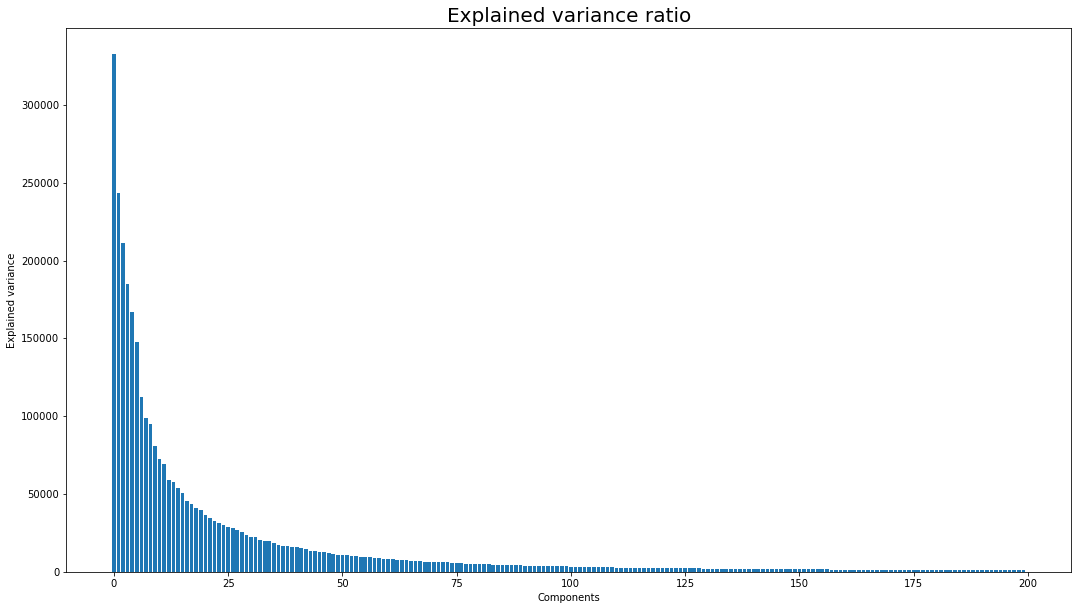

In [14]:
plt.figure(figsize=(18,10))
plt.bar(range(200),pca.explained_variance_)
plt.ylabel("Explained variance") #eigenvalues of the covariance matrix X
plt.xlabel("Components")
plt.title("Explained variance ratio",fontsize=20)

print("Explained variance of first principal component:", pca.explained_variance_[0])
print("Explained variance of 25th principal component:", (pca.explained_variance_[24]))
print("Explained variance ratio with 100 principal components:", sum(pca.explained_variance_ratio_[0:99]))
print("Explained variance ratio with 200 principal components:", sum(pca.explained_variance_ratio_))

#### 3.2 Ταξινόμηση στο χώρο των κύριων συνιστωσών

#### Προβάλουμε τα δεδομένα σε 200 principal components

In [19]:
#Keep all the PCs that we have specified, i.e. 200
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

#### Τα μετασχηματισμένα training sets πριν και μετά την προβολή του training dataset στα vectors που βρέθηκαν από την PCA

In [158]:
print(X_train.shape)
print(X_train_trans.shape)

(60000, 784)
(60000, 200)


#### Δοκιμάζουμε ταξινόμηση για διάσταση 200 και 784

In [24]:
knn_pca = KNeighborsClassifier(n_neighbors=3)

start = time.time()
knn_pca.fit(X_train_trans,y_train)
stop = time.time()
print("K-NN classification training time for 200 dims: {:.4f}".format(stop - start))
y_pred=knn_pca.predict(X_test_trans)
print("Error rate for 200 dims: ",1-accuracy_score(y_test, y_pred))

start = time.time()
knn_pca.fit(X_train,y_train)
stop = time.time()
print("K-NN classification training time for the original data: {:.4f}".format(stop - start))
y_pred=knn_pca.predict(X_test)
print("Error rate for full dims: ",1-accuracy_score(y_test, y_pred))

K-NN classification training time for 200 dims: 0.0244
Error rate for 200 dims:  0.029299999999999993
K-NN classification training time for the original data: 0.0668
Error rate for full dims:  0.02949999999999997


#### Δοκιμάζουμε ταξινόμηση για τις διάστασεις 5,10,15...95

In [101]:
from sklearn.model_selection import cross_val_predict

step5list = []
times = []
explained_sum = []
error_rate = []
knn_crossval = KNeighborsClassifier(n_neighbors=3)
    
def rangedPCA(start=5,end=100):
    i=0
    for n in range(start,end,5):
        step5list.append(n)
        X_train_trans_step5 = X_train_trans[:,0:n]
        
        start = time.time()
        y_train_pred = cross_val_predict(knn_crossval, X_train_trans_step5, y_train, cv=5)
        stop = time.time()
        
        times.append(stop-start)
        explained_sum.append(sum(pca.explained_variance_ratio_[0:n]))
        error_rate.append(1-accuracy_score(y_train, y_train_pred))
        
        print("~~~~ Results for the first {} PCs ~~~~".format(n))
        print("K-NN cross-val classification training time : {:.4f}".format(times[i]))
        print("Explained variance ratio:", explained_sum[i])
        print("Error rate : ",error_rate[i],"\n")
        i=i+1
    
rangedPCA()

~~~~ Results for the first 5 PCs ~~~~
K-NN cross-val classification training time : 3.0005
Explained variance ratio: 0.33227893691204646
Error rate :  0.2827166666666666 

~~~~ Results for the first 10 PCs ~~~~
K-NN cross-val classification training time : 11.0003
Explained variance ratio: 0.4881498035493395
Error rate :  0.07496666666666663 

~~~~ Results for the first 15 PCs ~~~~
K-NN cross-val classification training time : 26.7501
Explained variance ratio: 0.579337319638991
Error rate :  0.04328333333333334 

~~~~ Results for the first 20 PCs ~~~~
K-NN cross-val classification training time : 53.2147
Explained variance ratio: 0.6435808953674762
Error rate :  0.031850000000000045 

~~~~ Results for the first 25 PCs ~~~~
K-NN cross-val classification training time : 53.7174
Explained variance ratio: 0.69180490879996
Error rate :  0.0275333333333333 

~~~~ Results for the first 30 PCs ~~~~
K-NN cross-val classification training time : 53.2097
Explained variance ratio: 0.73054347144291

In [103]:
times

[3.000495433807373,
 11.000258445739746,
 26.750080347061157,
 53.21473026275635,
 53.71742367744446,
 53.2096688747406,
 57.03103232383728,
 54.689698219299316,
 54.58219504356384,
 52.40846800804138,
 54.62407660484314,
 58.074389934539795,
 54.3555748462677,
 54.69653844833374,
 54.70784950256348,
 56.85693717002869,
 63.87664246559143,
 63.07073378562927,
 66.72710800170898]

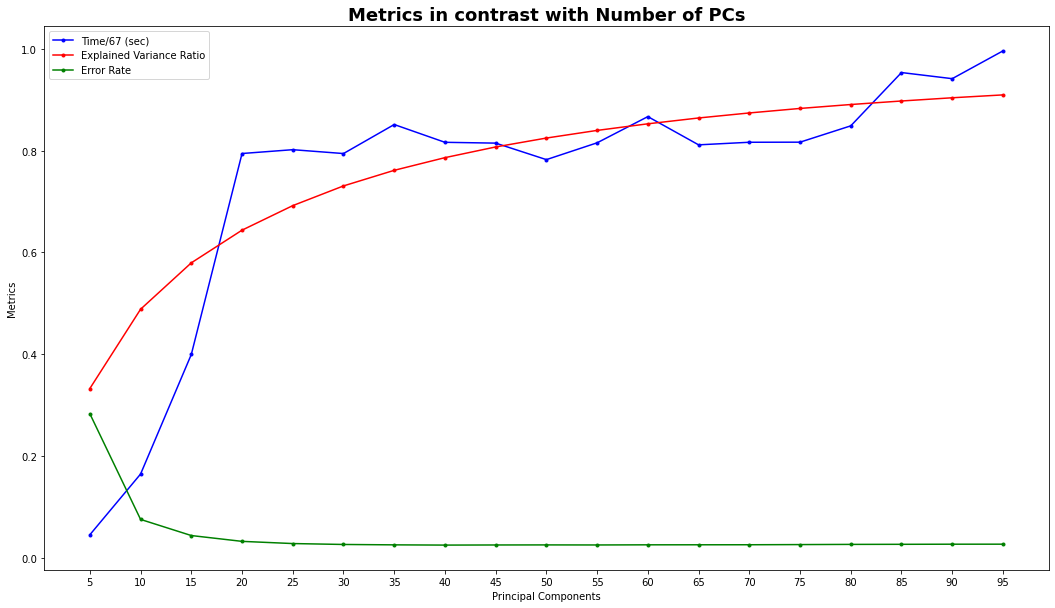

In [142]:
plt.figure(figsize=(18,10))

plt.title('Metrics in contrast with Number of PCs', fontdict={'fontweight':'bold', 'fontsize': 18})

norm_times = []
for j in range(len(times)):
    norm_times.append(times[j]/67)

plt.plot(step5list, norm_times, 'b.-', label='Time/67 (sec)')
plt.plot(step5list, explained_sum, 'r.-', label='Explained Variance Ratio')
plt.plot(step5list, error_rate, 'g.-', label='Error Rate')

plt.xticks(step5list[:])

plt.xlabel('Principal Components')
plt.ylabel('Metrics')

plt.legend()

plt.show()

### 3.3 Τελική ταξινόμηση

#### Θα κρατήσω 30 PCs

In [163]:
X_train_trans_30 = X_train_trans[:,0:30]
X_test_trans_30 = X_test_trans[:,0:30]

knn_pca_final = KNeighborsClassifier(n_neighbors=3)

start = time.time()
knn_pca_final.fit(X_train_trans_30,y_train)
stop = time.time()
print("K-NN classification training time for 30 dims: {:.4f}".format(stop - start))
y_pred=knn_pca_final.predict(X_test_trans_30)
print("Error rate for 30 dims: ",1-accuracy_score(y_test, y_pred))


K-NN classification training time for 30 dims: 0.0110
Error rate for 30 dims:  0.025900000000000034


Έχοντας προηγουμένως βρει ότι ισχύουν τα παρακάτω: <br />
K-NN classification training time for the original data: 0.0668 <br />
Error rate for full dims:  0.02949999999999997

In [156]:
save_time = 0.0668-0.0110
save_error = 0.02949999999999997-0.025900000000000034
print("Win in time = ",save_time)
print("Reduced error = ",save_error)

Win in time =  0.0558
Reduced error =  0.0035999999999999366


#### Η μείωση διαστάσεων με PCA δεν προκάλεσε αύξηση του σφάλματος. Αντίθετα, προκάλεσε βελτίωση. Λόγω της απλούστευσης του μοντέλου ο αλγόριθμος μπόρεσε να προβλέψει καλύτερα άγνωστα παραδείγματα.